ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

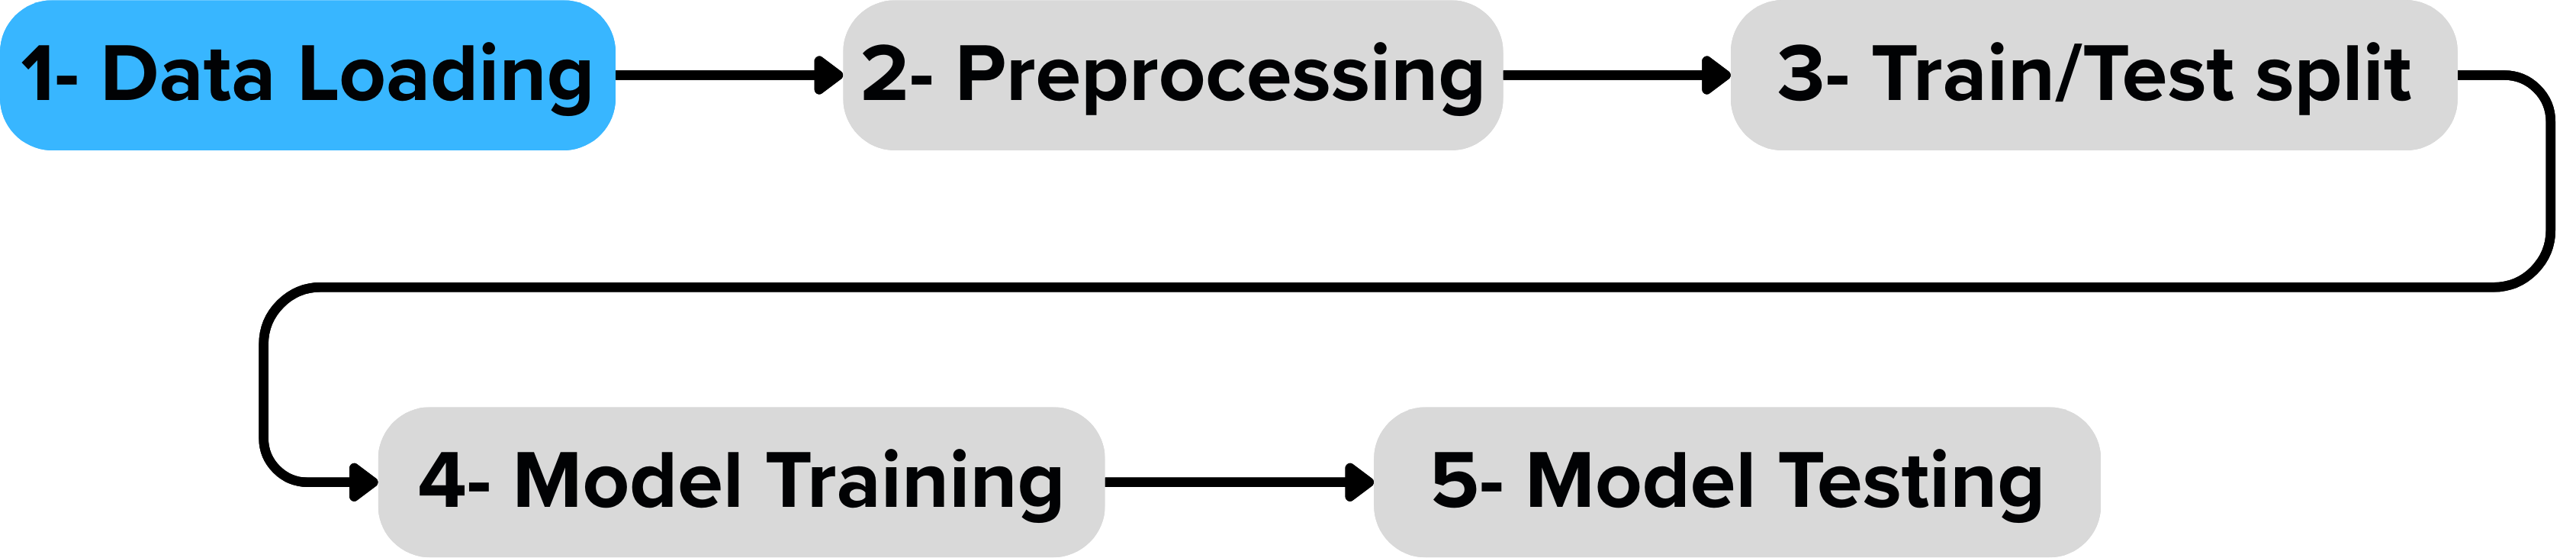

In [30]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Make plots look cleaner
sns.set()

## Loading data in different ways
### Option 1: Load local CSV

In [31]:
# Load Dataset

df = pd.read_csv("bmw.csv")

# Display first 5 rows
print(df.head(7),"\n")
print(df.info(),"\n")
print(df.describe())

       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   
5   5 Series  2016  14900    Automatic    35309   Diesel  125  60.1   
6   5 Series  2017  16000    Automatic    38538   Diesel  125  60.1   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  
5         2.0  
6         2.0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10

The dataset contains 10,781 BMW car records, where each row represents a single car listing. The dataset includes 9 columns describing different attributes of the cars.

The columns are:

model (categorical) – BMW model name (e.g., 5 Series, 1 Series, 7 Series)

year (numerical – integer) – Production year

price (numerical – integer) – Car price

transmission (categorical) – Transmission type (e.g., Automatic)

mileage (numerical – integer) – Total miles driven

fuelType (categorical) – Type of fuel (Diesel, Petrol, etc.)

tax (numerical – integer) – Road tax

mpg (numerical – float) – Miles per gallon

engineSize (numerical – float) – Engine size in liters

From the dataset structure, we can observe that it contains both categorical variables (model, transmission, fuelType) and numerical variables (year, price, mileage, tax, mpg, engineSize). All columns currently have the correct data types, and there are no missing values in the dataset.The dataset consists of individual chocolate sales records, where each row represents a single sales transaction.
The columns describe attributes such as the sales date, product information, sales location, and sales amount.
From the first few rows, we can observe that some columns contain textual data, while others contain numerical values stored as text, such as currency values. This indicates that data type verification is necessary before further analysis.

### Option 2: Load online dataset using tensorflow.keras.datasets

In [22]:
'''from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)'''

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 147s 1us/step
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


This example demonstrates how datasets can be loaded directly from online sources using built-in libraries. The CIFAR-10 dataset is downloaded automatically and provided in predefined training and testing sets. This approach is commonly used in supervised learning experiments, especially for image-based datasets, as it simplifies data access and preparation.

### Option 3: Kaggle-style path reading

In [ ]:
# train_df = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")
# test_df  = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/test.csv")

# train_df.head()

### Data type of columns

In [10]:
# viewing the data types of columns
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

After checking the data types using df.dtypes, we can observe that the dataset contains a mix of categorical and numerical variables.
The columns model, transmission, and fuelType are stored as object, which means they are categorical variables.
The columns year, price, mileage, and tax are stored as int64, indicating integer numerical values.
The columns mpg and engineSize are stored as float64, representing decimal numerical values.
This confirms that the dataset has appropriate data types for analysis. Numerical variables are correctly stored as integers or floats, and categorical variables are stored as objects. Therefore, no data type conversion is required before proceeding with further analysis.

### Check Missing Values

In [11]:
print(df.isna().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


The missing values analysis shows whether any features contain null or undefined values.
If missing values are present, they can affect summary statistics and machine learning models.
In this dataset, the presence or absence of missing values helps determine whether data cleaning steps, such as imputation or row removal, will be required in later preprocessing stages.

### Check duplicate rows

In [17]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

174     True
393     True
709     True
957     True
1173    True
        ... 
7808    True
9096    True
9797    True
9940    True
9943    True
Length: 117, dtype: bool

The duplicate records check identifies whether the same sales transaction appears more than once in the dataset.
Duplicate entries can bias the analysis by overrepresenting certain transactions or categories.
If duplicates exist, they should be investigated to determine whether they represent valid repeated transactions or data entry errors.

### No. of rows and columns before delete Dublicates

In [20]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape)

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (10664, 9)
number of rows:  10664
number of columns:  9


The dataset dimensions were inspected using the shape attribute. It consists of 10,781 records (rows) and 9 features (columns), representing the total volume of BMW sales data available for analysis.

In [21]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print("New shape after removing duplicates:", df.shape)

New shape after removing duplicates: (10664, 9)


In [ ]:
I decided to remove the 117 duplicates because, in a used car dataset, it is highly unlikely for two distinct vehicles to have
the exact same mileage and price. Therefore, these duplicates are treated as data entry errors rather than separate sales transactions.
Removing them ensures an accurate count of unique vehicles sold.

### Descriptive summary Statistics

In [16]:
# Statistical summary
df.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10781,10781.000000,10781.000000,10781,10781.000000,10781,10781.000000,10781.000000,10781.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,3 Series,NaN,NaN,Semi-Auto,NaN,Diesel,NaN,NaN,NaN
freq,2443,NaN,NaN,4666,NaN,7027,NaN,NaN,NaN
mean,NaN,2017.078935,22733.408867,NaN,25496.986550,NaN,131.702068,56.399035,2.167767
std,NaN,2.349038,11415.528189,NaN,25143.192559,NaN,61.510755,31.336958,0.552054
min,NaN,1996.000000,1200.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000
25%,NaN,2016.000000,14950.000000,NaN,5529.000000,NaN,135.000000,45.600000,2.000000
50%,NaN,2017.000000,20462.000000,NaN,18347.000000,NaN,145.000000,53.300000,2.000000
75%,NaN,2019.000000,27940.000000,NaN,38206.000000,NaN,145.000000,62.800000,2.000000


The descriptive statistics provide a comprehensive overview of the BMW dataset's features. The numerical summaries (such as Price, Mileage, and Tax) reveal the central tendency, spread, and range of values, highlighting the pricing trends and usage levels of the vehicles. Meanwhile, the categorical summaries (such as Model, Transmission, and FuelType) show the diversity of the inventory, including the number of unique categories and their frequencies. This confirms that the dataset contains 6 numerical features and 3 categorical features, providing a solid foundation for further exploratory data analysis and predictive modeling.

### Univariate Analysis
### Distribution of Price (Revenue)

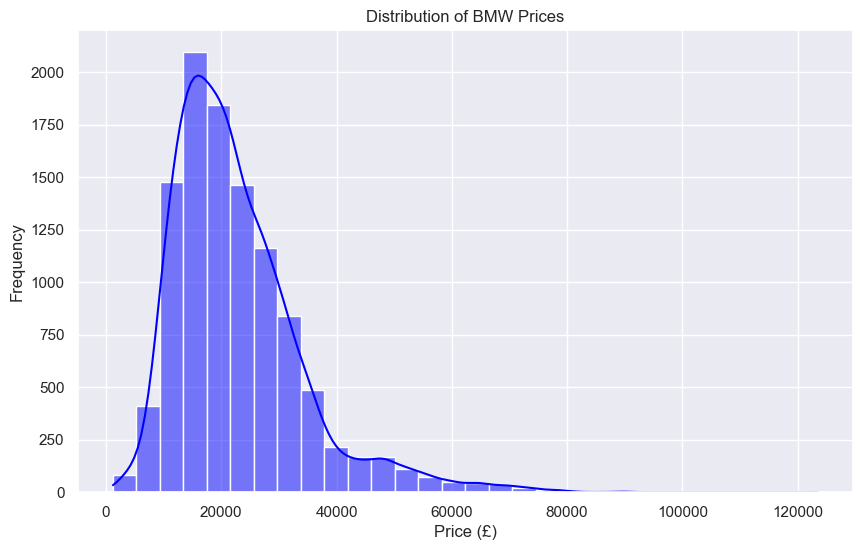

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title("Distribution of BMW Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

- Shows how car prices are distributed
- Right skew = many affordable cars, few luxury/expensive ones

"The distribution of BMW prices is right-skewed, indicating that most transactions involve relatively affordable models (mass-market), while a few transactions involve much more expensive luxury or high-performance models. Such skewness is common in automotive sales data and may influence later modeling decisions, such as the need for data transformation.

### Distribution of Mileage

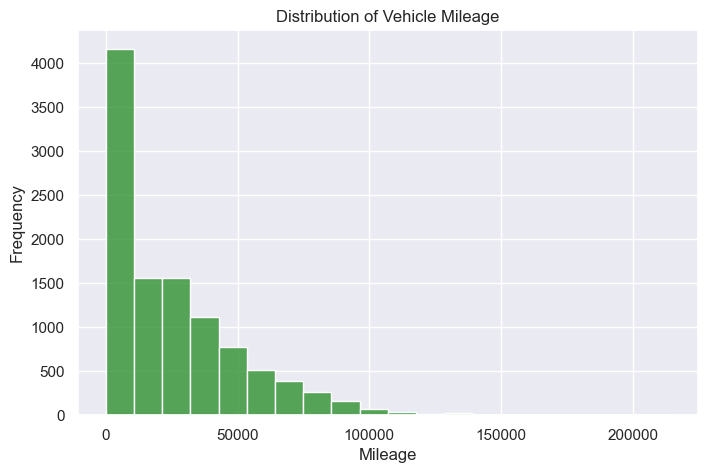

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['mileage'], bins=20, color='forestgreen')
plt.title("Distribution of Vehicle Mileage")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()

The distribution of vehicle mileage is also right-skewed. The majority of BMW cars in the dataset have relatively low to moderate mileage (below 50,000 miles), while a smaller portion of the dataset consists of high-mileage vehicles. This distribution is important because mileage is a key predictor of car prices, and understanding its spread helps in identifying the age and condition of the inventory.

## Bivariate Analysis

### Sales Value by Model Analysis

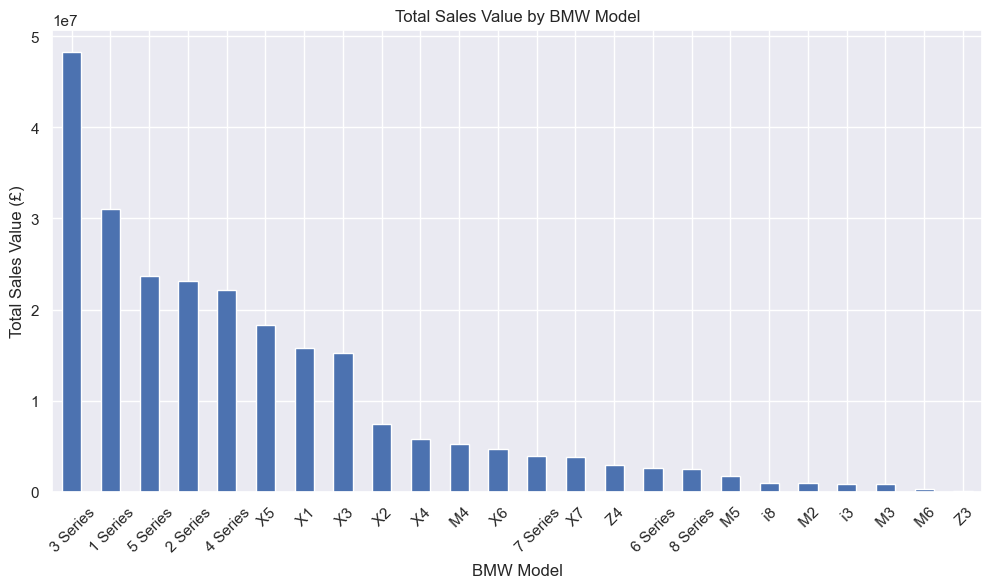

model
3 Series    48319016
1 Series    31021007
5 Series    23643594
2 Series    23101070
4 Series    22127788
X5          18355595
X1          15809263
X3          15258389
X2           7445497
X4           5775641
M4           5279831
X6           4646893
7 Series     3915038
X7           3841352
Z4           2880359
6 Series     2630272
8 Series     2495914
M5           1675040
i8            969214
M2            905947
i3            802686
M3            799254
M6            257520
Z3             40785
Name: price, dtype: int64

In [24]:
model_sales = df.groupby('model')['price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
model_sales.plot(kind='bar')
plt.title("Total Sales Value by BMW Model")
plt.xlabel("BMW Model")
plt.ylabel("Total Sales Value (£)")
plt.xticks(rotation=45)
plt.show()

model_sales

The total sales value varies significantly across different BMW models, with certain models like the 3 Series and 5 Series contributing much more to overall sales than others. This indicates clear differences in market demand and popularity among models, suggesting that model type is a critical categorical feature for understanding pricing and sales performance in this dataset.

### Revenue by Transmission Type Analysis

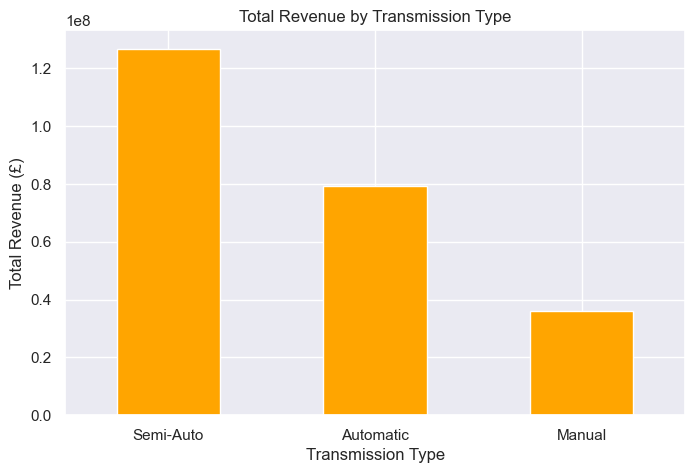

transmission
Semi-Auto    126764012
Automatic     79104580
Manual        36128373
Name: price, dtype: int64


In [25]:
transmission_revenue = df.groupby('transmission')['price'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
transmission_revenue.plot(kind='bar', color='orange')
plt.title("Total Revenue by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=0)
plt.show()
print(transmission_revenue)

The revenue distribution across different transmission types shows that certain categories, particularly Semi-Auto and Automatic, generate significantly higher total revenue than others. This highlights performance differences at the transmission level and suggests that the transmission type plays a significant role in revenue generation and vehicle pricing within the BMW dataset.

### Revenue by Fuel Type Analysis

In [26]:
fuel_revenue = df.groupby('fuelType')['price'].sum().sort_values(ascending=False)
print(fuel_revenue)

fuelType
Diesel      151985148
Petrol       81236415
Hybrid        8065025
Other          654979
Electric        55398
Name: price, dtype: int64


The revenue contribution varies among different fuel types, with Diesel and Petrol models generating significantly higher total revenue. This reflects differences in market availability, engine performance, and consumer preferences for traditional fuel types. This indicates that the fuel type feature is a key factor that influences sales outcomes and overall pricing in the BMW dataset.

### Mileage vs Price Relationship

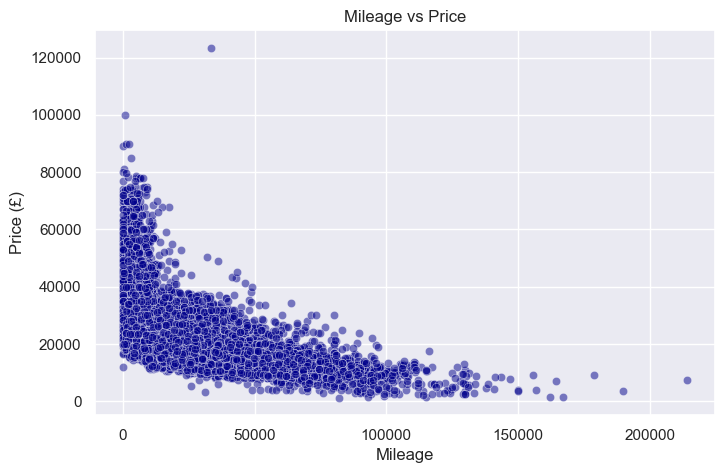

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.5, color='darkblue')
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price (£)")
plt.show()

The scatter plot shows a general negative relationship between the mileage and price. However, the spread of points indicates variability, suggesting that the price is influenced by additional factors beyond mileage, such as the model year, engine size, or transmission type. This variability highlights that while mileage is a key factor, it is not the sole determinant of a vehicle's market value.

### Correlation Matrix

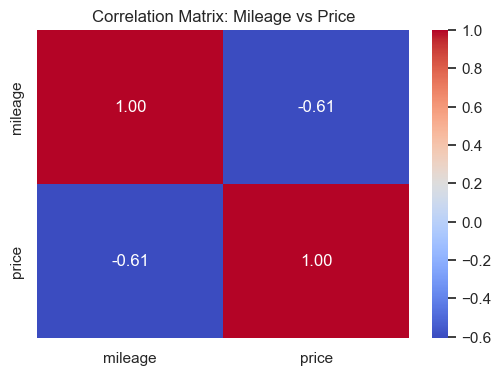

In [28]:
plt.figure(figsize=(6,4))
correlation_matrix = df[['mileage', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Mileage vs Price")
plt.show()

Correlation close to -1 = strong negative relationship

Close to 0 = weak relationship

The correlation matrix shows a strong negative correlation between mileage and price. This suggests that while mileage is a major factor in determining the vehicle's price, it is not the sole factor. Other features, such as model year and engine size, likely play an important role in explaining the remaining variation in car prices.

## Time-Based Analysis
### Yearly Sales Revenue Trend

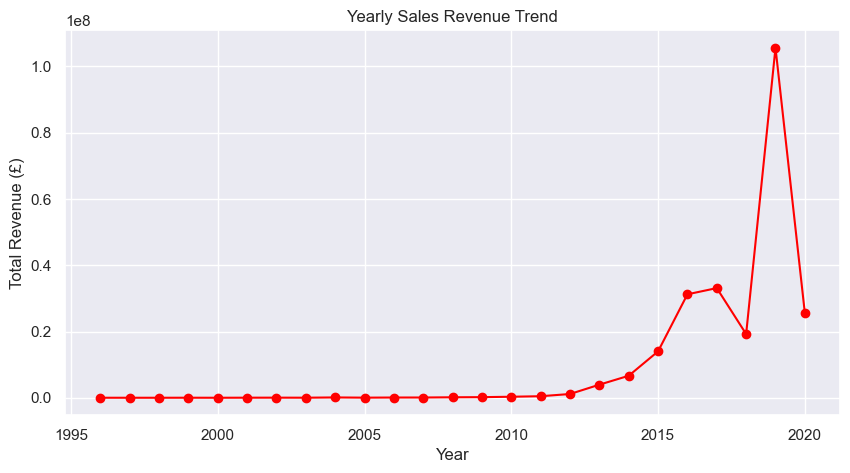

In [29]:
yearly_revenue = df.groupby('year')['price'].sum()
plt.figure(figsize=(10,5))
yearly_revenue.plot(kind='line', marker='o', color='red')
plt.title("Yearly Sales Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Total Revenue (£)")
plt.grid(True)
plt.show()

The yearly revenue trend shows significant growth over time, indicating a steady increase in sales volume or vehicle values in recent years. Identifying such trends is useful for understanding the market cycle and the lifecycle of different BMW models. This temporal pattern provides a strong basis for forecasting future sales and can inform time-series modeling in further analysis.

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.